# Visualizations using LDA and word embeddings on Twitter dataset.

This notebook is used for subsection 3. Can the relationship between words within a topic be visualized? In the this sub-question, a word embedding is createdbased on the sentences from each topic. The word embedding is used to create PCA, t-SNE, and UMAP of a Word2Vec model. In the projection, the most frequent words are shown.

In [4]:
#basic python methods
import pandas as pd 
import re
import numpy as np
import umap
from collections import Counter

#gensim models for topic modeling
import gensim
import gensim.models.ldamodel
from gensim.test.utils import common_dictionary, common_corpus


#visualizations tools
import matplotlib.pyplot as plt
from matplotlib import pyplot
from wordcloud import WordCloud
import seaborn as sns

#nlp tools
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#word embeddings methods
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from adjustText import adjust_text
import umap

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv(r"C:\Users\User\Documents\Thesis\data\twitter_dataset.csv", delimiter = ';')
df = df[0:2000]
df.dropna()

,message,event.cemistry.hashtags
0,#NYC #BROOKLYN please keep your eyes out!!! Pl...,"[ NYC, BROOKLYN, BOOST, QUEER ]"
1,"NEW YORK, Kayla has been missing for almost 48...","[ BOOST, NEWYORK ]"
2,"NEW YORK, Kayla has been missing for almost 48...","[ BOOST, NEWYORK ]"
3,@rohan_connolly #silentmajority #hush,"[ silentmajority, hush ]"
4,Ces travaux d'intérêt général auront lieu le 1...,"[ Burundi, YagaNawe ]"
...,...,...
1995,"NEW YORK, Kayla has been missing for almost 48...","[ BOOST, NEWYORK ]"
1996,"NEW YORK, Kayla has been missing for almost 48...","[ BOOST, NEWYORK ]"
1997,Nova CPI é criada para apurar as condições de ...,"[ CPI, Educacao, camarotes, defesa ]"
1998,தேசிய அந்தஸ்தை இழக்கும் இடதுசாரிகள்…நான்கு மாந...,"[ Communists, KathirNews, National, Lose, Comm..."


Nltk has libaries for common English, French and Spanish words. For other stopwords this set is created.

In [6]:
stopwords_mix = {'oya','ego','canke','amp','&amp','&amp', 'http', 'https', 'plus', 'contre', 'nest', 'cest' ,'après', 'cette', 'burundi', 'comme', 'burundais', 'ong','tout', 'sans',
                     'depuis', 'ils', 'si', 'tous','leurs', 'parti', 'ans', 'selon', 'info','faire',
                     'deux','fait','pace', 'period.','exceeding', 'year-earlier','soaring.'
                    , 'new', 'avoir'
                 ,'très','non','vient','où','quil','jour','encore','get','one', 
                     'like', 'need', 'since','time','last','got','know','well','real','via',"del","por","el","los",
                    "para","di","una","al","https","nhttps",'amp','&amp;','&','!','?',':','-',"alors","au","aucuns","aussi","autre","avant","avec","avoir", "aux","bon","car","ce","cela","ces","ceux","chaque","ci","comme","comment","dans","des",
                    "du","dedans","dehors","depuis","devrait","doit","donc","dos","début","elle","elles","en","encore","essai","est","et","eu","fait","faites","fois",
                    "font","hors","ici","il","ils","je","juste","la","le","les","leur","là","ma","maintenant","mais","mes","mine","moins","mon","mot","même","ni","nommés","notre","nous",
                    "ou","où","par","parce","pas","peut","peu","plupart","pour","pourquoi","quand","que","quel","quelle","quelles","quels","qui","sa","sans","ses",
                    "seulement","si","sien","son","sont","sous","soyes","sujet","sur","ta","tandis","tellement","tels","tes","ton","tous","tout","trop","très","tu","voient",
                    "un","une","vont","votre","vous","vu","ça","étaient","état","étions","été","être","ne","se","y","ont","nos","dit","dire",
                   "c","d","lui","l","moi","va","n","na","rien","autres","bien","sera","suis","vie","soit","quon",
                   "bonne","quils","jamais","entre","k","te","ourselves", "hers", "between", "yourself", "but", "again", "there", "about", "once", 
                     "during", "out", "very", "having", "with", "they", "own", "an", "be", "some", "for", 
                     "do", "de", "its", "yours", "such", "into", "of", "most", "itself", "other", "off", "is", "s", 
                     "am", "or", "who", "as", "from", "him", "each", "the", "themselves", "until", "below", "are", 
                     "we", "these", "your", "his", "through", "don", "nor", "me", "were", "her", "more", "himself", 
                     "this", "down", "should", "our", "their", "while", "above", "both", "up", "to", "ours", "had", 
                     "she", "all", "no", "when", "at", "any", "before", "them", "same", "and", "been", "have", "in", 
                     "will", "on", "does", "yourselves", "then", "that", "because", "what", "over", "why", "so", "can",
                     "did", "not", "now", "under", "he", "you", "herself", "has", "just", "where", "too", "only", "myself",
                     "which", "those", "i", "after", "few", "whom", "t", "being", "if", "theirs", "my", "against", "a", "by",
                     "doing", "it", "how", "further", "was", "here", "than", "https","nhttps",'amp','&amp;','&','!','?',':','-'}

In [ ]:
def clean_message(current_message):
    new_string = ""
    p = re.compile('@[a-zA-Z]+')
    findall = p.findall(str(current_message))
    current_message = re.sub(r'@[a-zA-Z]+', '', str(current_message))
    current_message = re.sub(r'[^a-zA-Z ]', '', str(current_message))
    for word in current_message.lower().split(" "):
   
        if not word.startswith("@" or "#" or "http"):
            if not word in set(stopwords.words("english")):
                if not word in set(stopwords.words("french")):
                    if not word in set(stopwords.words("spanish")):
                        if not word in set(stopwords.words("spanish")):
                            if len(word) > 1:
                                if not word in stopwords_mix:
                     
                                    new_string += (str(word) + " ")
    return(new_string)

In [ ]:
def tokenize_message(current_message):
    new_list = []
    p = re.compile('@[a-zA-Z]+')
    findall = p.findall(str(current_message))
    current_message = re.sub(r'@[a-zA-Z]+', '', str(current_message))
    current_message = re.sub(r'[^a-zA-Z ]', '', str(current_message))
    for word in current_message.lower().split(" "):
   
        if not word.startswith("@" or "#" or "http"):
            if not word in set(stopwords.words("english")):
                if not word in set(stopwords.words("french")):
                    if not word in set(stopwords.words("spanish")):
                        if len(word) > 1:
                            if not word in stopwords_mix:
                     
                                new_list.append(str(word))
    return(new_list)

Tokenized messages are used as input to train a dictionary. 1000 most common words are kept. A word corpus is created form the dictionary.

In [ ]:
df.dropna()

df['message'] = df['message'].apply(clean_message)

df['tokenize_message'] = df['message'].apply(tokenize_message)

dictionary = gensim.corpora.Dictionary(df['tokenize_message'])

dictionary.filter_extremes(no_below=1, no_above=0.5, keep_n=1000)

bow_corpus = [dictionary.doc2bow(doc) for doc in df['tokenize_message']]

LDA model is trained to create two ouput topics.

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=2, id2word=dictionary, passes=2, workers=2)

For each message the topic will be calculated.

In [7]:
def score_LDA(message):
    bow_vector = dictionary.doc2bow(str(message).lower().split())
    scorelist = []
    for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]): 
        scorelist.append(index)
    return(scorelist[0])

df['LDA_score'] = df[message1].apply(score_LDA)

For each topic a barplot will be created with the most important words.

No handles with labels found to put in legend.


['rt', 'rose', 'past', 'families', 'con', 'american', 'average', 'months,', 'earnings', 'wages', 'hourly', 'lesa', 'cpi', 'ante', 'fiscal', 'people', 'humanidad', 'us', 'crímenes', 'inflation', 'como', 'es', 'president', 'regime', 'penal']


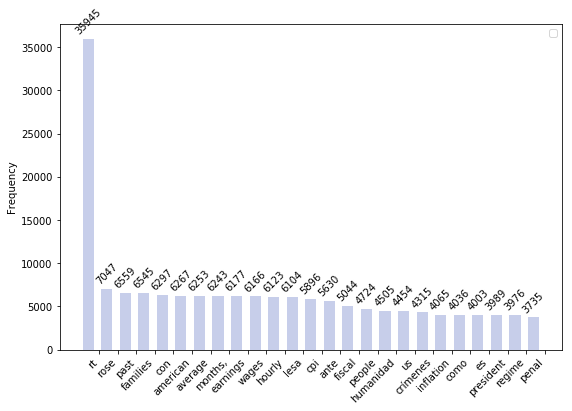

No handles with labels found to put in legend.


['rt', 'président', 'pays', 'crimes', 'ayuda', 'aseguró', 'serán', 'militares', 'humanitaria', 'bloqueen', 'llevados', 'commune', 'dun', 'victimes', 'police', 'ministre', 'dune', 'régime', 'droits', 'chambre', 'politique', 'jean-pierre', 'campagne', 'membres', 'justice']


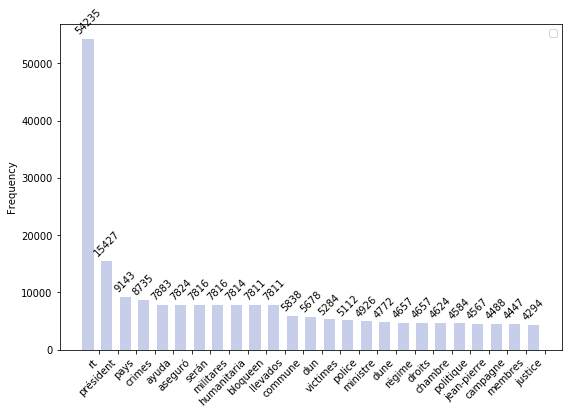

In [21]:
for x in range(number_of_topics):
    df_topic = df[df.LDA_score == x] 
    message = df_topic[message1]
    word_list = ['']
    for row in message:
        if type(row) == type(str()):
            row = row.split(" ")
            for word in row:
                if not word in twitter_list:
                    if not word.startswith("#"):
                        if not word.startswith("@"):
                            result = re.match("[a-zA-Z]", word)
                            if result:
                                word_list.append(word.replace("'", "").replace(" ", ""))

    cnt = Counter()
    for word in word_list:
        word = word.lower()
        if not word in set(stopwords.words("english")):
            if not word in set(stopwords.words("french")):
                if not word in set(stopwords.words("spanish")):
                    if len(word) > 1:
                        if not word in stopwords_mix:
                            cnt[word] += 1
    
    words = []
    numbers = []
    for word in cnt.most_common(25):
        words.append(word[0])
        numbers.append(word[1])
    
    labels = words
    men_means = numbers
    
    print(labels)

    x = np.arange(len(labels))  
    width = 0.60  

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, men_means, width, color="#C7CEEA")

    
    ax.set_ylabel('Frequency')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation = 45, ha='right')
    ax.legend()
    def autolabel(rects):
    
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        rotation = 45,
                        textcoords="offset points",
                        
                        ha='center', va='bottom')


    autolabel(rects1)
    
    wordcloud = WordCloud().generate(str(cnt.most_common(25)))           
 
    plt.show()

# PCA plot

For each topic, for the 25 most occuring words the vector distance is caculated (in an unique word dimensional space). The vector is created by using all the message in text as training featues. The vector is used form all three visualizations.

In [12]:
list1 = ['rt', 'président', 'pays', 'crimes', 'ayuda', 'aseguró', 'serán', 'militares', 'humanitaria', 'llevados', 'bloqueen', 'commune', 'dun', 'victimes', 'police', 'ministre', 'dune', 'régime', 'droits', 'chambre', 'politique', 'jean-pierre', 'campagne', 'membres', 'justice']
list2 = ["el", 'los', 'por', 'del', 'para', 'rose', 'past', 'families', 'con', 'american', 'average', 'months,', 'earnings', 'wages', 'hourly', 'lesa', 'cpi', 'ante', 'fiscal', 'people', 'di', 'humanidad', 'us', 'crímenes']
words = list1 + list2
topic_group = {}
for word in list1:
    topic_group[word] = "green"
for word in list2:
    topic_group[word] = "blue"
print(topic_group)  

{'rt': 'green', 'président': 'green', 'pays': 'green', 'crimes': 'green', 'ayuda': 'green', 'aseguró': 'green', 'serán': 'green', 'militares': 'green', 'humanitaria': 'green', 'llevados': 'green', 'bloqueen': 'green', 'commune': 'green', 'dun': 'green', 'victimes': 'green', 'police': 'green', 'ministre': 'green', 'dune': 'green', 'régime': 'green', 'droits': 'green', 'chambre': 'green', 'politique': 'green', 'jean-pierre': 'green', 'campagne': 'green', 'membres': 'green', 'justice': 'green', 'el': 'blue', 'los': 'blue', 'por': 'blue', 'del': 'blue', 'para': 'blue', 'rose': 'blue', 'past': 'blue', 'families': 'blue', 'con': 'blue', 'american': 'blue', 'average': 'blue', 'months,': 'blue', 'earnings': 'blue', 'wages': 'blue', 'hourly': 'blue', 'lesa': 'blue', 'cpi': 'blue', 'ante': 'blue', 'fiscal': 'blue', 'people': 'blue', 'di': 'blue', 'humanidad': 'blue', 'us': 'blue', 'crímenes': 'blue'}


/home/sije/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


104

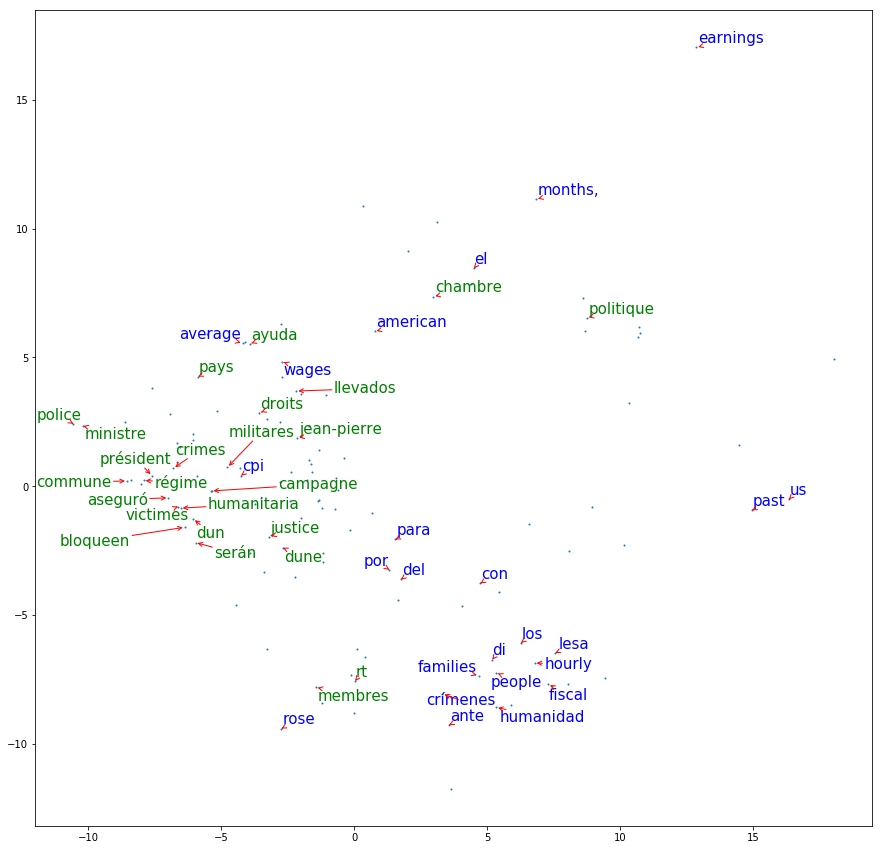

In [13]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

model = Word2Vec(message, min_count=1000)

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=10)
Y = pca.fit_transform(X)
pyplot.scatter(Y[:, 0], Y[:, 1],s=1)
texts = [plt.text(Y[i, 0], Y[i, 1], word, ha='center', va='center', size=15, color=topic_group[word]) for i, word in enumerate(words)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# t-SNE plot

/home/sije/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


144

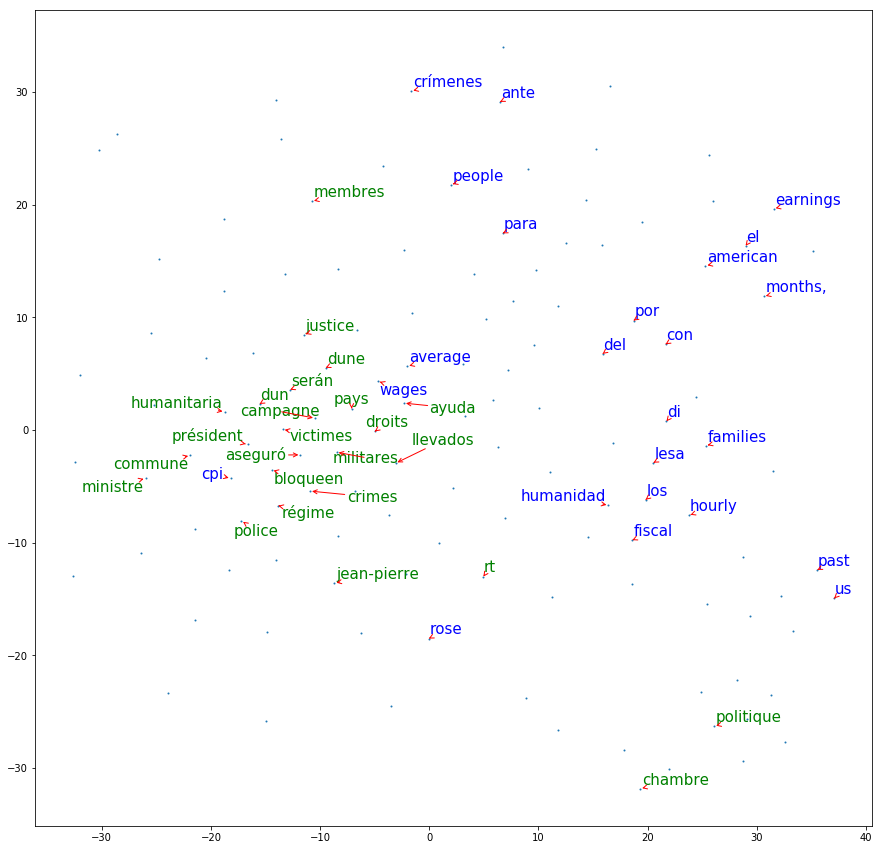

In [17]:
model = Word2Vec(message, min_count=1000)
X = model[model.wv.vocab]
Y = TSNE(n_components=2).fit_transform(X)
#Y.shape
fig, ax = plt.subplots()
# create a scatter plot of the projection
pyplot.scatter(Y[:, 0], Y[:, 1],s=1)
texts = [plt.text(Y[i, 0], Y[i, 1], word, ha='center', va='center', size=15, color=topic_group[word]) for i, word in enumerate(words)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# UMAP plot

/home/sije/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


34

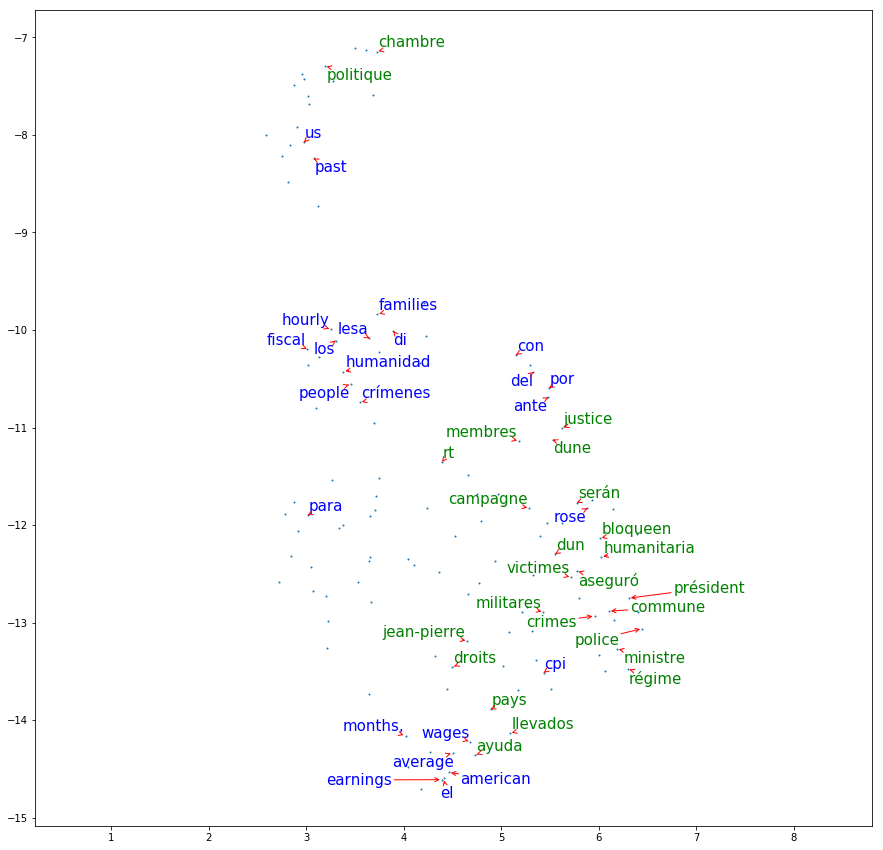

In [18]:
reducer = umap.UMAP()
model = Word2Vec(message, min_count=1000)
X = model[model.wv.vocab]
Y = reducer.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1],s=1)
plt.gca().set_aspect('equal', 'datalim')
texts = [plt.text(Y[i, 0], Y[i, 1], word, ha='center', va='center', size=15,color=topic_group[word]) for i, word in enumerate(words)]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))